In [1]:
# Math stuff
import numpy as np
# For handling dataset
import pandas as pd
# For plotting
import matplotlib.pyplot as plt
# Model used as a benchmark
from sklearn.svm import OneClassSVM
# For undersampling
from imblearn.under_sampling import RandomUnderSampler
# metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix

In [33]:
# loading the dataset
df = pd.read_csv('creditcard.csv')
df = df[['V11', 'V15', 'V18', 'Class']]

In [34]:
X, y = df.iloc[:,:-1].copy(), df.iloc[:,-1:].copy()

The OneClassSVM classifier split out as result 1 and -1. <br />
So, we must adapt our y (labels).

In [35]:
isLegit = y.Class == 0

In [113]:
rus = RandomUnderSampler(random_state=0, ratio={0:246*40, 1:246}, return_indices=True)

In [114]:
X_resampled, y_resampled, idxs = rus.fit_sample(X, y)
X_resampled = pd.DataFrame(X_resampled)
X_resampled.columns = df.columns[:-1]

In [115]:
params = { 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], \
    'nu':[.1, 0.261, .5, .75, .8] }

In [116]:
clf = OneClassSVM(kernel='rbf', nu=.50, gamma=0.50)

In [117]:
clf.fit(X_resampled)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.5, kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [ ]:
y_pred = clf.predict(X[~y.index.isin(idxs)])
y_true = y[~y.index.isin(idxs)]
print y_pred

In [111]:
y_pred[y_pred==1] = 1
y_pred[y_pred==-1] = 0

In [112]:
tn, fp, fn, tp = confusion_matrix(y_pred=y_pred, y_true=y_true).ravel()
confusion_matrix(y_pred=y_pred, y_true=y_true)

array([[135270, 144125],
       [   224,     22]], dtype=int64)

In [102]:
precision, recall, _ = precision_recall_curve(y_pred, y_true)
auc = average_precision_score(y_true=y_true, y_score=y_pred)

print 'precision %.7f' % precision[1]
print 'recall %.7f' % recall[1]
print 'auc %.7f' % auc

precision 0.8089431
recall 0.0042569
auc 0.0036116


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [13]:
scoring = {'AUC':make_scorer(average_precision_score)}

In [14]:
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=OneClassSVM(), param_grid=params, n_jobs=-1, scoring=scoring, refit='AUC')

In [15]:
clf.fit(X_resampled, y_resampled)

GridSearchCV(cv=None, error_score='raise',
       estimator=OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'nu': [0.1, 0.261, 0.5, 0.75, 0.8]},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score=True,
       scoring={'AUC': make_scorer(average_precision_score)}, verbose=0)

In [16]:
clf.best_estimator_

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto',
      kernel='linear', max_iter=-1, nu=0.1, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

In [17]:
def minmax(x):
    return min(x), max(x)

In [18]:
xmin, xmax = minmax(X.V11)
ymin, ymax = minmax(X.V15)
zmin, zmax = minmax(X.V18)

xx, yy, zz = np.mgrid[xmin:xmax:.5, ymin:ymax:.5, zmin:zmax:.5]

In [19]:
Z = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

In [ ]:
Z = clf.best_estimator_.decision_function(Z)

In [ ]:
Z = np.reshape(Z, xx.shape)

In [ ]:
plt.contour(xx[:,:,0], yy[:,:,0], Z[:,:,0])

plt.scatter(X[isLegit].V11, X[isLegit].V15, s=1, c='b')
plt.scatter(X[~isLegit].V11, X[~isLegit].V15, s=1, c='r')

plt.show()

In [ ]:
y_pred = clf.predict(X)

In [ ]:
isLegit = y_pred == 1
plt.scatter(X.V11[isLegit], X.V15[isLegit], c='r', s=1)
plt.scatter(X.V11[~isLegit], X.V15[~isLegit], c='b', s=1)
plt.show()

In [ ]:
np.bincount(df.Class[~df.Class.index.isin(idxs)])

In [20]:
y_pred = clf.predict(X[~y.index.isin(idxs)])
y_true = y[~y.index.isin(idxs)]

In [21]:
tn, fp, fn, tp = confusion_matrix(y_pred=y_pred, y_true=y_true).ravel()
confusion_matrix(y_pred=y_pred, y_true=y_true)

array([[116288, 163107],
       [   148,     98]], dtype=int64)

In [22]:
precision, recall, _ = precision_recall_curve(y_pred, y_true)
auc = average_precision_score(y_true=y_true, y_score=y_pred)

print 'precision %.7f' % precision[1]
print 'recall %.7f' % recall[1]
print 'auc %.7f' % auc

precision 0.3983740
recall 0.0006005
auc 0.0007685


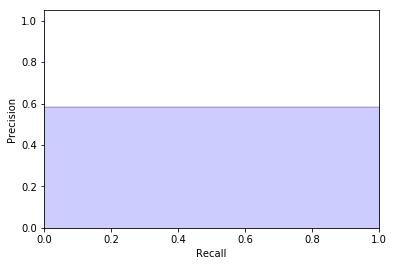

In [23]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()